In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [22]:
df= pd.read_csv('Diwali Sales Data.csv', encoding= 'unicode_escape')

In [23]:
df.shape

(11251, 15)

In [24]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [25]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  str    
 2   Product_ID        11251 non-null  str    
 3   Gender            11251 non-null  str    
 4   Age Group         11251 non-null  str    
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  str    
 8   Zone              11251 non-null  str    
 9   Occupation        11251 non-null  str    
 10  Product_Category  11251 non-null  str    
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), str(8)
memory usage: 1.3 MB


In [29]:
df.drop(['Status', 'unnamed1'],axis=1, inplace=True)

In [31]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  str    
 2   Product_ID        11251 non-null  str    
 3   Gender            11251 non-null  str    
 4   Age Group         11251 non-null  str    
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  str    
 8   Zone              11251 non-null  str    
 9   Occupation        11251 non-null  str    
 10  Product_Category  11251 non-null  str    
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
dtypes: float64(1), int64(4), str(8)
memory usage: 1.1 MB


In [33]:
pd.isnull(df).sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [34]:
df.dropna(inplace=True)

In [36]:
df['Amount']= df['Amount'].astype('int')

In [37]:
df['Amount'].dtypes

dtype('int64')

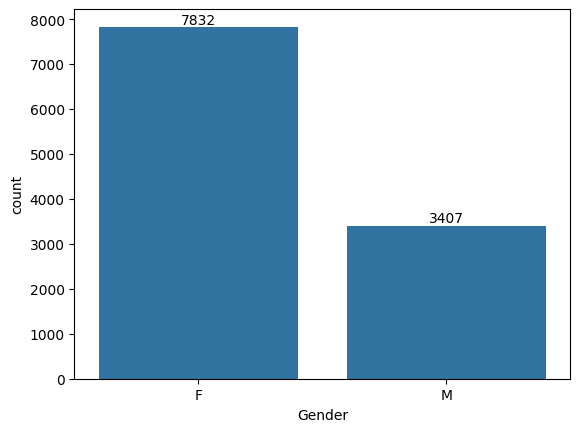

In [43]:
ax= sns.countplot(x='Gender', data =df)
for bars in ax.containers:
    ax.bar_label(bars)

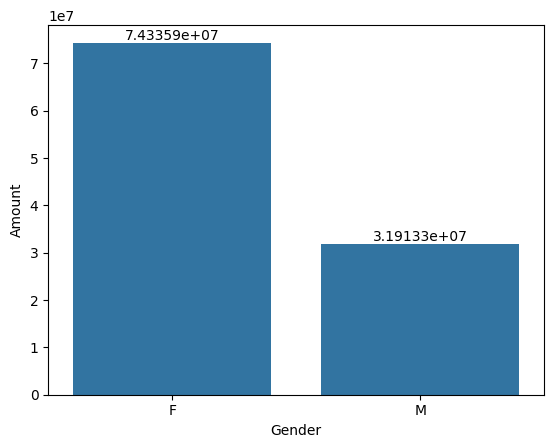

In [51]:
gender_sales= df.groupby(['Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)
bx=sns.barplot(x='Gender', y= 'Amount', data = gender_sales)
for bars in bx.containers:
    bx.bar_label(bars)

<Axes: xlabel='Age Group', ylabel='Amount'>

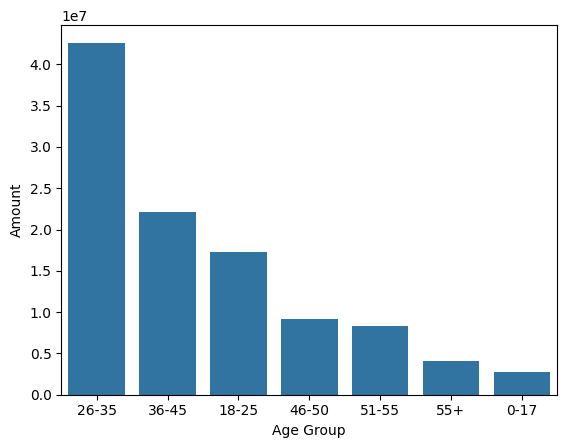

In [56]:
age_sales= df.groupby(['Age Group'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending= False)
sns.barplot(x='Age Group', y ='Amount', data = age_sales )

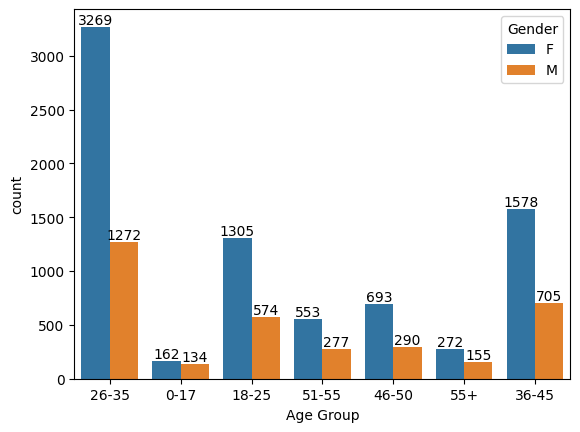

In [52]:
ax = sns.countplot(x='Age Group', hue= 'Gender', data = df)
for bars in ax.containers:
    ax.bar_label(bars)

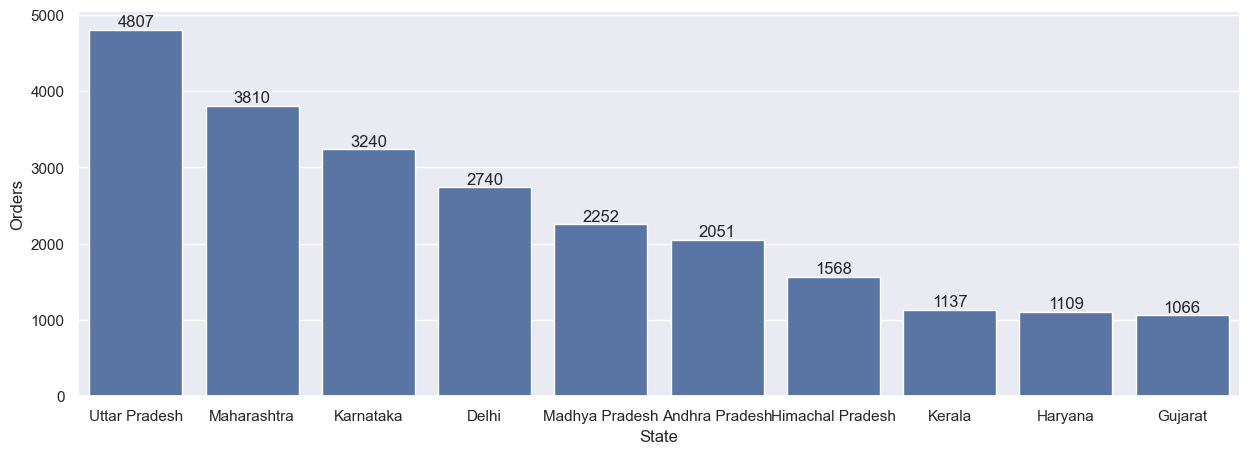

In [59]:
state_sales= df.groupby(['State'], as_index= False)['Orders'].sum().sort_values(by='Orders', ascending=False).head(10)
sns.set(rc={'figure.figsize':(15,5)})
ax=sns.barplot(x='State', y= 'Orders', data= state_sales)
for bars in ax.containers:
    ax.bar_label(bars)

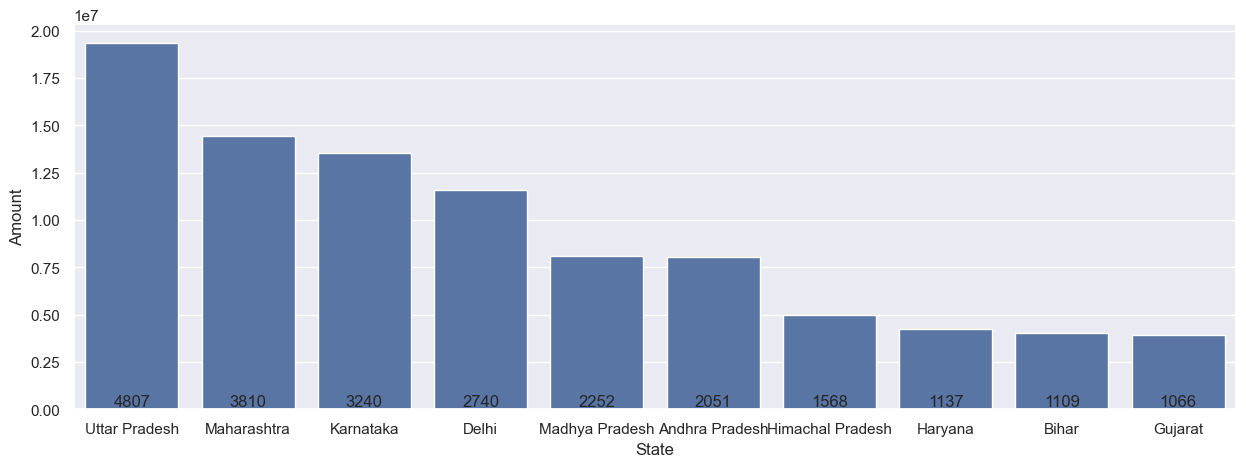

In [61]:
state_sales= df.groupby(['State'], as_index=False) ['Amount'].sum().sort_values(by='Amount', ascending=False).head(10)
ax= sns.barplot(x='State', y= 'Amount', data= state_sales)
for bar in ax.containers:
    ax.bar_label(bars)

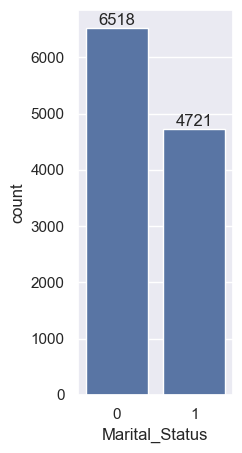

In [72]:
ax= sns.countplot(x='Marital_Status', data = df)
sns.set(rc={'figure.figsize':(2,5)})
for bar in ax.containers:
    ax.bar_label(bars)

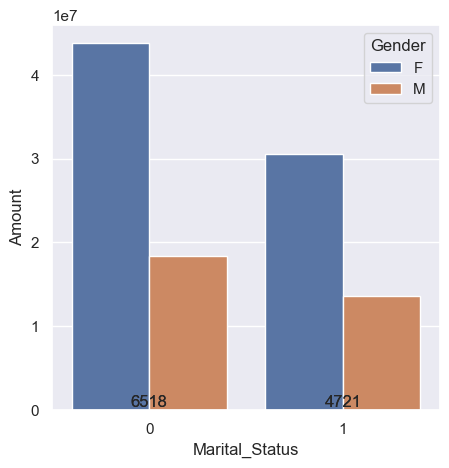

In [77]:
sales_status =  df.groupby(['Marital_Status','Gender'], as_index= False)['Amount'].sum().sort_values(by='Amount', ascending= False)
sns.set(rc={'figure.figsize':(5,5)})
ax= sns.barplot(x='Marital_Status', hue='Gender', y = 'Amount', data = sales_status)
for bar in ax.containers:
    ax.bar_label(bars)

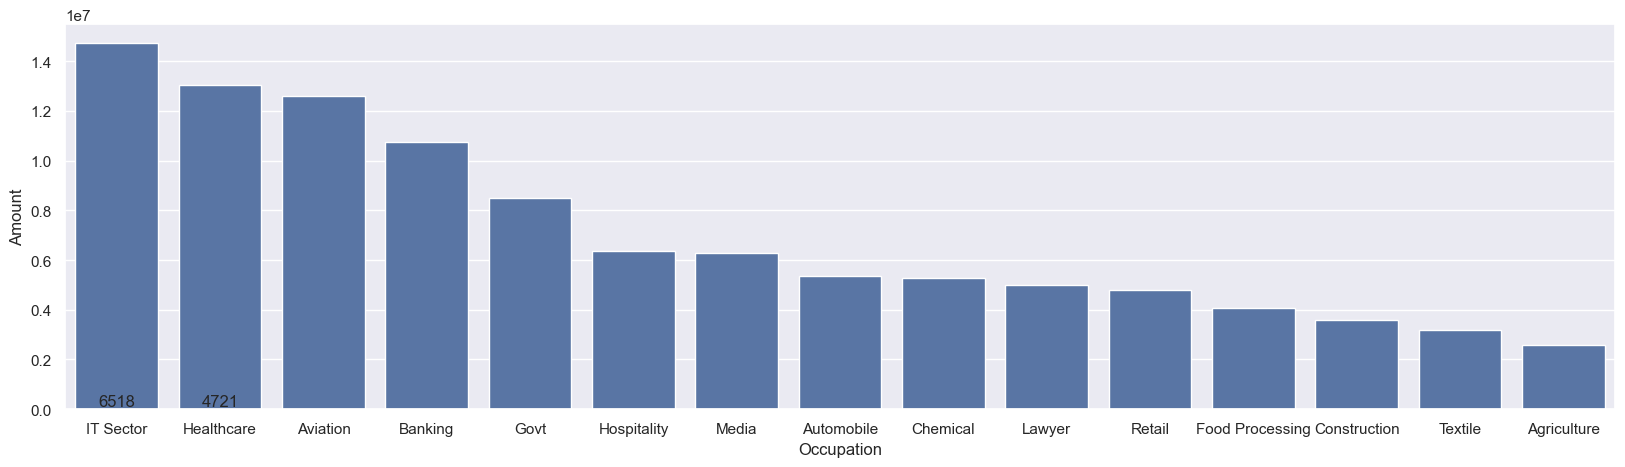

In [85]:
sale_occ= df.groupby(['Occupation'], as_index=False) ['Amount'].sum().sort_values(by='Amount', ascending= False)
ax= sns.barplot(x='Occupation', y = 'Amount', data= sale_occ)
sns.set(rc={'figure.figsize':(23,5)})
for bar in ax.containers:
    ax.bar_label(bars)

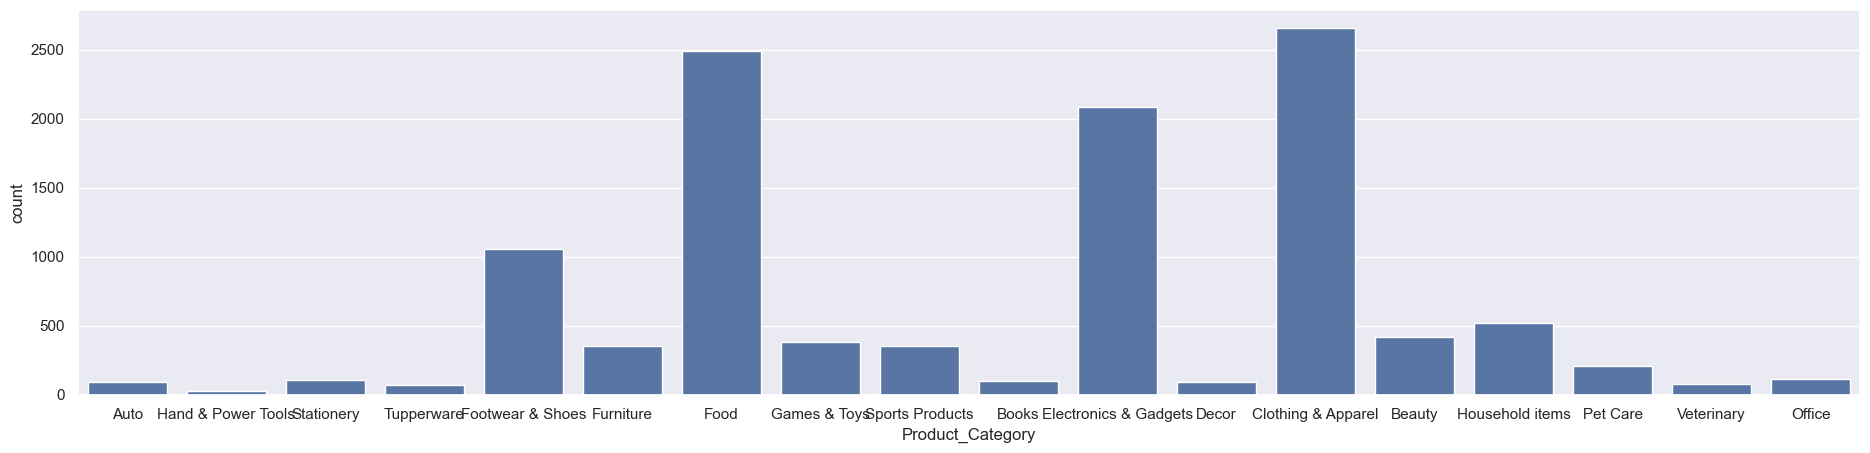

In [86]:
ax=sns.countplot(x='Product_Category', data=df)
for bar in ax.containers:
    ax.bar_label(bars)

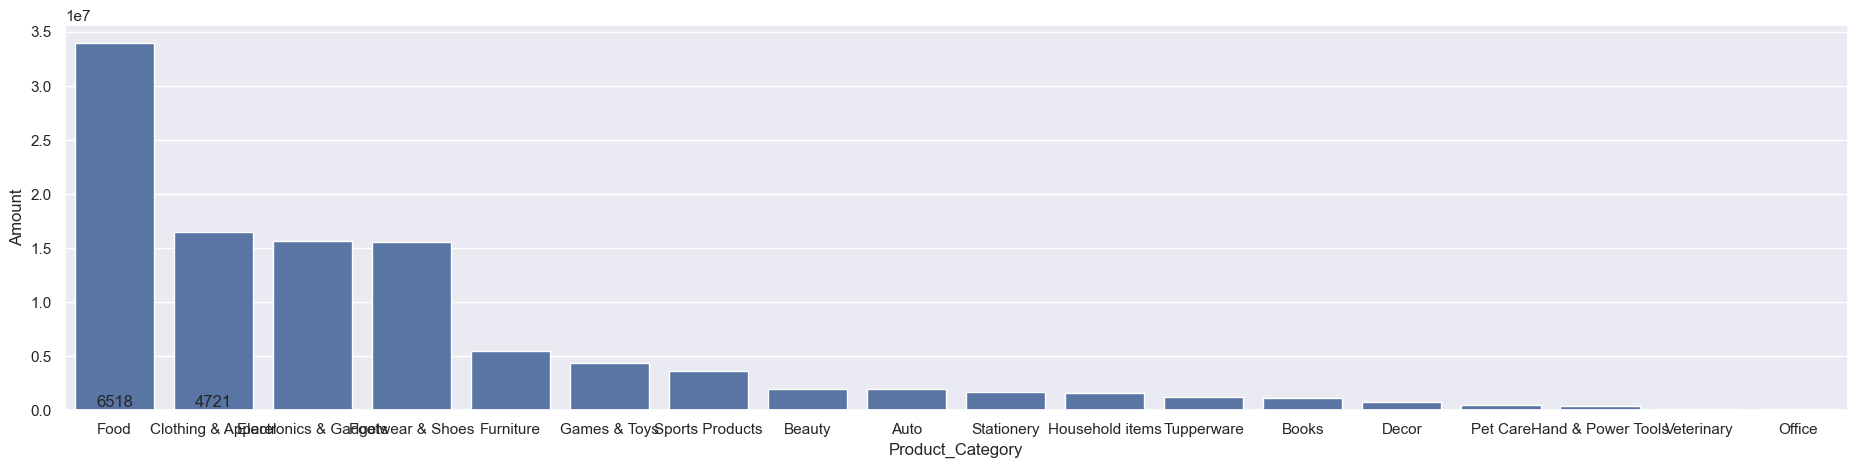

In [89]:
sale_product= df.groupby(['Product_Category'], as_index= False)['Amount'].sum().sort_values(by='Amount', ascending= False)
ax= sns.barplot(x= 'Product_Category', y = 'Amount', data = sale_product)
for bar in ax.containers:
    ax.bar_label(bars)

Conclusion:

Married women age group 26-35 yrs from UP, Maharastra and Karnataka working in IT, Healthcare and Aviation are more likely to buy products from Food, Clothing and Electronics category